# LGMVIP - Data Science Intern
# Task - 2
# Stock Market Prediction And Forecasting Using Stacked LSTM
# Name - Daksh Pathak

# Importing the required libraries

In [ ]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns

# Loading the Dataset

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/mwitiderrick/stockprice/master/NSE-TATAGLOBAL.csv')
df.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55


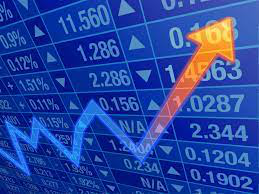

In [ ]:
from PIL import Image
stocks_image = Image.open('stocks.jpg')
stocks_image

# New Section

In [ ]:
df.tail()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
2030,2010-07-27,117.6,119.50,112.00,118.80,118.65,586100,694.98
2031,2010-07-26,120.1,121.00,117.10,117.10,117.60,658440,780.01
2032,2010-07-23,121.8,121.95,120.25,120.35,120.65,281312,340.31
2033,2010-07-22,120.3,122.00,120.25,120.75,120.90,293312,355.17
2034,2010-07-21,122.1,123.00,121.05,121.10,121.55,658666,803.56


# Displaying Rows and Columns

In [ ]:
df.shape

(2035, 8)

# Displaying Stats of data

In [ ]:
df.describe()

,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
count,2035.000000,2035.000000,2035.000000,2035.000000,2035.00000,2.035000e+03,2035.000000
mean,149.713735,151.992826,147.293931,149.474251,149.45027,2.335681e+06,3899.980565
std,48.664509,49.413109,47.931958,48.732570,48.71204,2.091778e+06,4570.767877
min,81.100000,82.800000,80.000000,81.000000,80.95000,3.961000e+04,37.040000
25%,120.025000,122.100000,118.300000,120.075000,120.05000,1.146444e+06,1427.460000
50%,141.500000,143.400000,139.600000,141.100000,141.25000,1.783456e+06,2512.030000
75%,157.175000,159.400000,155.150000,156.925000,156.90000,2.813594e+06,4539.015000
max,327.700000,328.750000,321.650000,325.950000,325.75000,2.919102e+07,55755.080000


# Displaying info about datatypes

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2035 entries, 0 to 2034
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Date                  2035 non-null   object 
 1   Open                  2035 non-null   float64
 2   High                  2035 non-null   float64
 3   Low                   2035 non-null   float64
 4   Last                  2035 non-null   float64
 5   Close                 2035 non-null   float64
 6   Total Trade Quantity  2035 non-null   int64  
 7   Turnover (Lacs)       2035 non-null   float64
dtypes: float64(6), int64(1), object(1)
memory usage: 127.3+ KB


# Checking for Null Values

In [ ]:
df.isnull().sum()

Date                    0
Open                    0
High                    0
Low                     0
Last                    0
Close                   0
Total Trade Quantity    0
Turnover (Lacs)         0
dtype: int64

# Getting maximum values 

In [ ]:
df.max()

Date                    2018-09-28
Open                         327.7
High                        328.75
Low                         321.65
Last                        325.95
Close                       325.75
Total Trade Quantity      29191015
Turnover (Lacs)            55755.1
dtype: object

# Getting minimum values 

In [ ]:
df.min()

Date                    2010-07-21
Open                          81.1
High                          82.8
Low                             80
Last                            81
Close                        80.95
Total Trade Quantity         39610
Turnover (Lacs)              37.04
dtype: object

# Check if null values are present

In [ ]:
df.isnull()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
2030,False,False,False,False,False,False,False,False
2031,False,False,False,False,False,False,False,False
2032,False,False,False,False,False,False,False,False
2033,False,False,False,False,False,False,False,False


# Data visualization

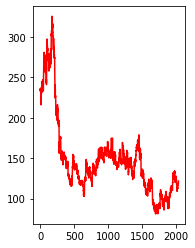

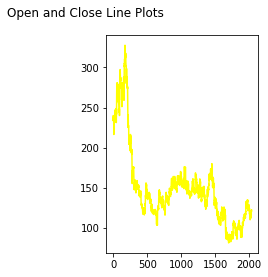

In [ ]:
plt.subplot (1,2,1)
plt.plot (df['Close'],color = 'red')
plt.show()

plt.subplot(1,2,2)
plt.plot (df['Open'],color = 'yellow')
plt.suptitle ("Open and Close Line Plots")
plt.show()

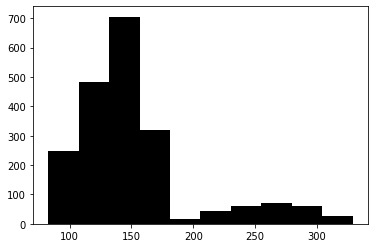

In [ ]:
plt.hist (df['High'],color = 'black')
plt.show()


# To display no. of samples on each class

In [ ]:
df_low = df.reset_index()['Low']
df_low

0       230.20
1       231.10
2       232.50
3       232.00
4       230.75
         ...  
2030    112.00
2031    117.10
2032    120.25
2033    120.25
2034    121.05
Name: Low, Length: 2035, dtype: float64

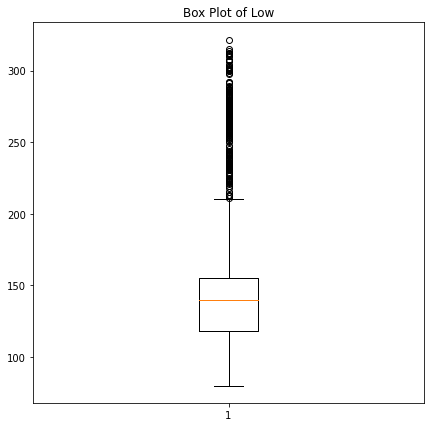

In [ ]:
plt.figure (figsize = (7,7))
plt.boxplot (df_low)
plt.title ("Box Plot of Low")
plt.show()

# Here we will use min-max scalar to transform the values from 0 to 1.We should reshape so that we can use fit transform.

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler (feature_range = (0,1))
df_low = scaler.fit_transform (np.array(df_low).reshape(-1,1))

In [ ]:
print (df_low)

[[0.62156011]
 [0.6252845 ]
 [0.63107801]
 ...
 [0.16656321]
 [0.16656321]
 [0.16987378]]


# Train and Test Split

In [ ]:
training_size=int(len(df_low)*0.65)
test_size=len(df_low)-training_size
train_data,test_data=df_low[0:training_size,:],df_low[training_size:len(df_low),:1]

In [ ]:
training_size,test_size

(1322, 713)

In [ ]:
train_data

array([[0.62156011],
       [0.6252845 ],
       [0.63107801],
       ...,
       [0.25181047],
       [0.26174219],
       [0.25305193]])

# Data Preprocessing

# convert an array of values into a dataset matrix

In [ ]:
import numpy
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [ ]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

 print(X_train.shape), print(y_train.shape)

# LSTM

In [ ]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

# Create the Stacked LSTM model

In [ ]:

from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.models import Sequential


In [ ]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

# Summary

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
20/20 [==============================] - 12s 288ms/step - loss: 0.0325 - val_loss: 0.0042
Epoch 2/100
20/20 [==============================] - 4s 194ms/step - loss: 0.0040 - val_loss: 0.0015
Epoch 3/100
20/20 [==============================] - 4s 191ms/step - loss: 0.0017 - val_loss: 0.0010
Epoch 4/100
20/20 [==============================] - 4s 193ms/step - loss: 0.0016 - val_loss: 0.0012
Epoch 5/100
20/20 [==============================] - 4s 194ms/step - loss: 0.0015 - val_loss: 0.0014
Epoch 6/100
20/20 [==============================] - 4s 199ms/step - loss: 0.0014 - val_loss: 9.6339e-04
Epoch 7/100
20/20 [==============================] - 4s 186ms/step - loss: 0.0014 - val_loss: 0.0011
Epoch 8/100
20/20 [==============================] - 4s 195ms/step - loss: 0.0012 - val_loss: 0.0011
Epoch 9/100
20/20 [==============================] - 4s 201ms/step - loss: 0.0012 - val_loss: 8.9434e-04
Epoch 10/100
20/20 [==============================] - 4s 198ms/step - loss: 0.0012

In [ ]:
import tensorflow as tf

In [ ]:
tf.__version__

'2.7.0'

# Prediction

In [ ]:
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [ ]:
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

165.62932841758044

In [ ]:
math.sqrt(mean_squared_error(ytest,test_predict))

115.26395297730967

# Plotting

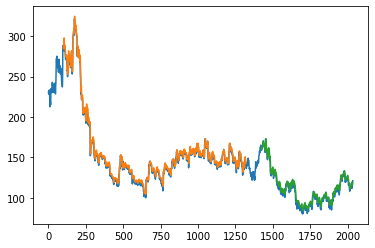

In [ ]:
# shift train predictions for plotting
look_back=100
trainPredictPlot = numpy.empty_like(df_low)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df_low)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df_low)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df_low))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

# Predicting Stock Price for next 30 days

In [ ]:
len(test_data)

713

In [ ]:
x_input=test_data[613:].reshape(1,-1)
x_input.shape

(1, 100)

In [ ]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [ ]:
temp_input

[0.1249741361473205,
 0.13945789364783778,
 0.13904407200496582,
 0.1373887854334782,
 0.13490585557624662,
 0.14214773432650524,
 0.13656114214773435,
 0.12849162011173182,
 0.12456031450444854,
 0.09724808607490171,
 0.11276639768259877,
 0.14959652389819988,
 0.14111318021932545,
 0.1531140078626112,
 0.14525139664804465,
 0.1460790399337885,
 0.1655286571487689,
 0.17835712807779847,
 0.18290916614938968,
 0.19573763707841918,
 0.19449617214980341,
 0.1827022553279537,
 0.18415063107800544,
 0.18704738257810882,
 0.17835712807779847,
 0.18208152286364576,
 0.1843575418994413,
 0.1779433064349265,
 0.16759776536312848,
 0.19573763707841918,
 0.18849575832816057,
 0.19325470722118765,
 0.19966894268570246,
 0.19884129939995865,
 0.20153114007862605,
 0.20070349679288224,
 0.1992551210428306,
 0.1918063314711359,
 0.2002896751500104,
 0.2112559486861163,
 0.21249741361473207,
 0.20691082143596107,
 0.2205669356507346,
 0.21146285950755228,
 0.20546244568590943,
 0.19490999379267537,
 

#  Prediction for next 10 days

In [ ]:

from numpy import array

lst_output=[]
n_steps=100
nextNumberOfDays=30
i=0

while(i<nextNumberOfDays):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
print(lst_output)

[0.17500049]
101
1 day input [0.13945789 0.13904407 0.13738879 0.13490586 0.14214773 0.13656114
 0.12849162 0.12456031 0.09724809 0.1127664  0.14959652 0.14111318
 0.15311401 0.1452514  0.14607904 0.16552866 0.17835713 0.18290917
 0.19573764 0.19449617 0.18270226 0.18415063 0.18704738 0.17835713
 0.18208152 0.18435754 0.17794331 0.16759777 0.19573764 0.18849576
 0.19325471 0.19966894 0.1988413  0.20153114 0.2007035  0.19925512
 0.19180633 0.20028968 0.21125595 0.21249741 0.20691082 0.22056694
 0.21146286 0.20546245 0.19490999 0.17877095 0.17877095 0.17090834
 0.16201117 0.17049452 0.174012   0.17856404 0.17732257 0.16511484
 0.16470101 0.16987378 0.17380509 0.1721498  0.17173598 0.17794331
 0.18001241 0.1874612  0.19325471 0.18663356 0.17421891 0.17711566
 0.17318436 0.17380509 0.1663563  0.14938961 0.15187254 0.15352783
 0.15145872 0.14649286 0.1491827  0.13242293 0.12849162 0.11793917
 0.11628388 0.12290503 0.12725016 0.13490586 0.13345748 0.13242293
 0.13056073 0.13242293 0.13138837

In [ ]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
len(df_low)

2035

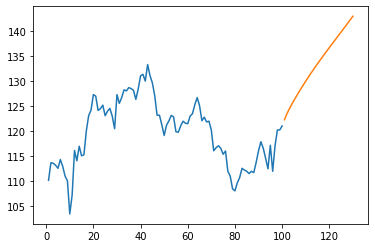

In [ ]:
plt.plot(day_new,scaler.inverse_transform(df_low[1935:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))
plt.show()

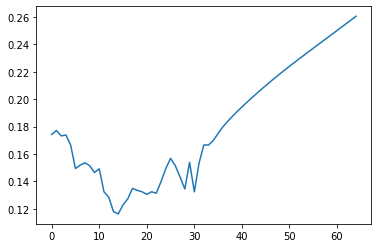

In [ ]:
df3=df_low.tolist()
df3.extend(lst_output)
plt.plot(df3[2000:])
plt.show()

In [ ]:
df3=scaler.inverse_transform(df3).tolist()

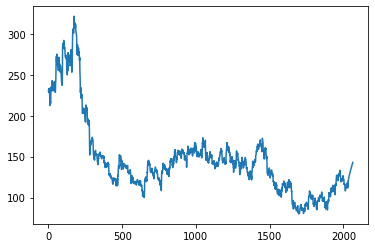

In [ ]:
plt.plot(df3)
plt.show()

# Thank You!